In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import datasets                                        #Import libraries & dataset


import matplotlib.pyplot as plt

In [2]:
# Load digits dataset
digits = datasets.load_digits()

In [3]:
x = digits.data 
 
y = digits.target 
 
print(x[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [5]:
# Splitting the dataset into training and test set.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

In [6]:
len(y_train)

1437

In [7]:
len(y_test)

360

In [8]:
print(len(x_test) , len(x_train))

360 1437


Using k-Nearest Neighbor classifier we are using different values of k to obtain maximum accuracy

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kVals = range(1, 11)
accuracies = []

for k in range(1, 11):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(x_train, y_train)
          # evaluate the model and update the accuracies list
          score = model.score(x_test, y_test)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

k=1, accuracy=98.61%
k=2, accuracy=98.61%
k=3, accuracy=98.61%
k=4, accuracy=98.33%
k=5, accuracy=98.33%
k=6, accuracy=98.06%
k=7, accuracy=98.33%
k=8, accuracy=97.78%
k=9, accuracy=98.06%
k=10, accuracy=97.78%


From above output best value of k is 1,2 & 3 which gives maximum accuracy 

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)                 # K=3 

In [12]:
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred= knn.predict(x_test) 
y_pred

array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 6, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 1, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 1, 2, 9, 4, 4, 1, 2, 7, 8, 4, 2, 6, 8, 3, 7, 3, 9, 6, 1, 1, 0,
       9, 2, 1, 6, 3, 4, 8, 7, 1, 0, 0, 4, 6, 5, 8, 2, 8, 1, 3, 0, 0, 8,
       6, 4, 3, 9, 3, 3, 3, 3, 0, 7, 0, 0, 1, 9, 5, 8, 1, 5, 0, 6, 6, 6,
       6, 1, 7, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
       9, 5, 8, 9, 9, 7, 9, 1, 9, 5, 4, 7, 3, 0, 4, 9, 7, 7, 5, 6, 5, 8,
       3, 4, 5, 4, 9, 2, 5, 5, 2, 1, 3, 8, 8, 9, 3, 6, 1, 0, 1, 4, 0, 5,
       5, 6, 6, 7, 4, 3, 8, 4, 1, 0, 7, 9, 2, 1, 4, 8, 4, 2, 4, 0, 0, 0,
       2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 8, 2, 3, 9, 2, 3, 0, 6, 8, 7,
       1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 8, 3, 2, 0, 3, 4, 1, 9, 9, 9,
       6, 3, 7, 1, 6, 9, 4, 7, 1, 8, 1, 3, 0, 5, 3,

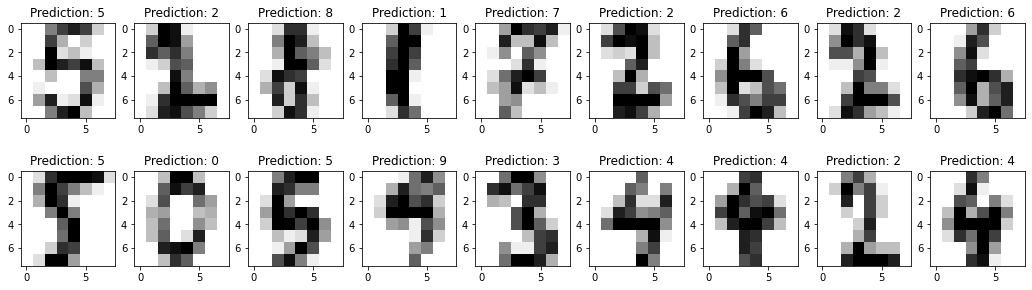

In [14]:
images_and_prediction = list(zip(x_test, y_pred))

plt.figure(figsize =(18,5))
for index, (image, prediction) in enumerate(images_and_prediction[:18]):
    plt.subplot(2,9, index +1)
    image =image.reshape(8,8)
    plt.imshow(image, cmap =plt.cm.gray_r, interpolation ='nearest')
    plt.title('Prediction: %i' % prediction)
    
plt.savefig('Plot.png',dpi=300,bbox_inches='tight')

In [15]:
knn.score(x_test,y_test)

0.9861111111111112

2. Plot confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 34]], dtype=int64)

3. Plot classification report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

